For smoothed mouths we need to fill in any new grid points.

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import nc_tools
from salishsea_tools import tidetools
%matplotlib inline

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# read in old meshmask
nc_filepath1 = '../../NEMO-forcing/grid/mesh_mask_downbyone.nc'
old_mesh = nc.Dataset(nc_filepath1)
old_tmask = old_mesh.variables['tmask'][:]

In [3]:
# read in new meshmask
nc_filepath2 = '../../NEMO-forcing/grid/mesh_mask_downbyone2.nc'
new_mesh = nc.Dataset(nc_filepath2)
new_tmask = new_mesh.variables['tmask'][:]

Find cells that are now water that were not water before

In [4]:
combine = old_tmask - new_tmask
#print (combine[0,1,:,2])
print (np.max(combine), np.min(combine))
itemindex = np.where(combine[0, 0]==-1)
print (itemindex)

1 -1
(array([451, 452, 453, 454, 455, 455, 456, 456, 456, 457, 457, 457, 457,
       458, 458, 458, 458, 458, 459, 459, 459, 459, 459, 459, 459, 460,
       460, 460, 460, 460, 460, 460, 461, 461, 461, 461, 461, 461, 462,
       462, 462, 462, 462, 462, 462, 463, 463, 463, 463, 463, 463, 464,
       464, 464, 464, 464, 464, 465, 465, 465, 465, 465, 883, 883, 884,
       884, 885, 885, 886, 886, 887, 887, 888, 888, 889, 889, 890, 891,
       891, 892, 892, 894, 895, 895, 895, 896, 896, 896, 896, 896, 896]), array([12, 12, 12, 11, 10, 11,  9, 10, 11,  7,  8,  9, 10,  6,  7,  8,  9,
       10,  4,  5,  6,  7,  8,  9, 10,  4,  5,  6,  7,  8,  9, 10,  4,  5,
        6,  7,  8,  9,  3,  4,  5,  6,  7,  8,  9,  3,  4,  5,  6,  7,  8,
        2,  3,  4,  5,  6,  7,  1,  2,  3,  4,  5, 53, 54, 52, 53, 51, 52,
       50, 51, 49, 50, 48, 49, 47, 48, 46, 45, 46, 44, 45, 55, 53, 54, 55,
       50, 51, 52, 53, 54, 55]))


(40, 60)

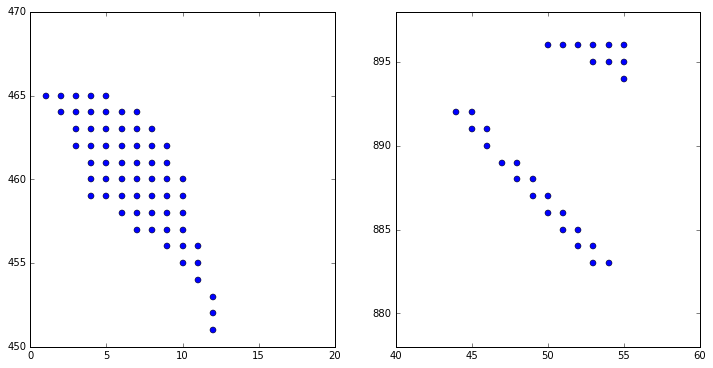

In [5]:
# plot these "surface problem" cells
Xs = np.array(itemindex[1])
Ys = np.array(itemindex[0])
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(Xs, Ys, 'o')
ax[0].set_ylim((450, 470))
ax[0].set_xlim((0, 20))
ax[1].plot(Xs, Ys, 'o')
ax[1].set_ylim((878, 898))
ax[1].set_xlim((40, 60))

Look at all new cells

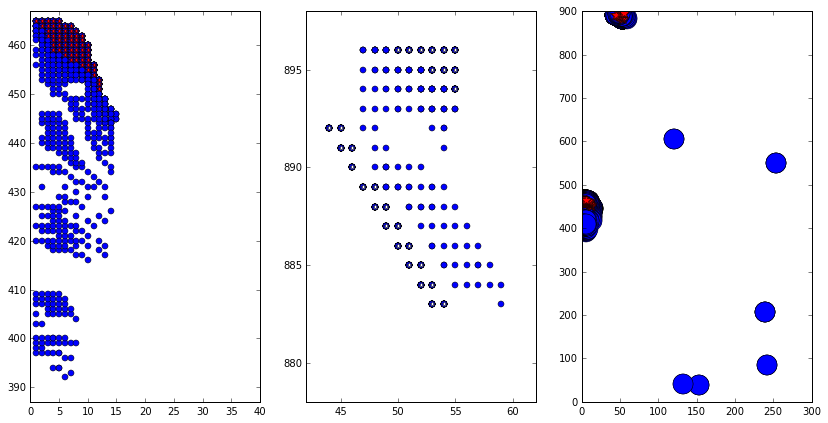

In [6]:
allindex = np.where(combine[0]==-1)
# plot all these "problem" cells
allXs = np.array(allindex[2])
allYs = np.array(allindex[1])
allZs = np.array(allindex[0])
fig, ax = plt.subplots(1, 3, figsize=(14,7))
ax[0].plot(allXs, allYs, 'o')
ax[0].plot(Xs, Ys, 'r*')
ax[0].set_ylim((387, 467))
ax[0].set_xlim((0, 40))
ax[1].plot(allXs, allYs, 'o')
ax[1].plot(Xs, Ys, 'w*')
ax[1].set_ylim((878, 898))
ax[1].set_xlim((42, 62))
ax[2].plot(allXs, allYs, 'o', markersize=20)
ax[2].plot(Xs, Ys, 'r*',markersize=10)

In [7]:
# read in old TS from saved results
nc_filepath_oldTS = '/results/SalishSea/nowcast-green/01jul16/SalishSea_1h_20160701_20160701_grid_T.nc'
TS = nc.Dataset(nc_filepath_oldTS, 'r')
old_salinity = TS.variables['vosaline'][23]
old_temperature = TS.variables['votemper'][23]
print (TS.variables.keys())
print (old_salinity.shape)

odict_keys(['buoy_n2', 'deptht', 'deptht_bounds', 'mixed_depth', 'nav_lat', 'nav_lon', 'sossheig', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vosaline', 'votemper'])
(40, 898, 398)


In [8]:
new_salinity = np.copy(old_salinity)
new_temperature = np.copy(old_temperature)
for x, y, z in zip(allXs[allXs>100], allYs[allXs>100], allZs[allXs>100]):
    new_salinity[z, y, x] = new_salinity[z-1, y, x]
    new_temperature[z, y, x] = new_temperature[z-1, y, x]
    print (z,y,x)

8 84 242
9 84 242
9 207 239
10 84 242
10 207 239
11 207 239
11 605 121
12 605 121
13 605 121
14 550 253
15 550 253
16 550 253
17 39 153
17 208 239
17 550 253
18 39 153
18 208 239
19 39 153
19 42 132
20 42 132


(32, 62)

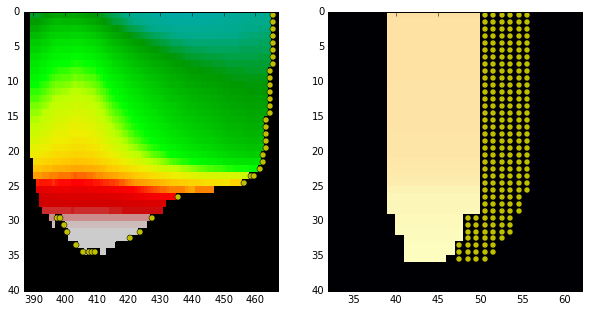

In [9]:
# plot old salinity across two open boundaries
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].pcolormesh(old_salinity[:, :, 1], cmap='spectral', vmin=29)
ax[0].plot(allYs[allXs==1]+0.5, allZs[allXs==1]+0.5, 'yo')
ax[0].invert_yaxis()
ax[0].set_xlim((387, 467))

ax[1].pcolormesh(old_salinity[:, 896, :], cmap='magma')
ax[1].plot(allXs[allYs==896]+0.5, allZs[allYs==896]+0.5, 'yo')
ax[1].invert_yaxis()
ax[1].set_xlim(32, 62)


(32, 62)

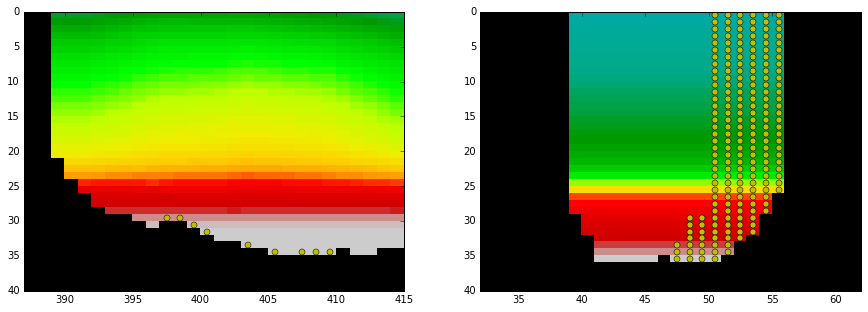

In [10]:
# fix my single bad surface western boundary point
new_salinity[:, 465, 1] = old_salinity[:, 464, 1]
new_temperature[:, 465, 1] = old_temperature[:, 464, 1]

for y in range (406, 465):
    for z in allZs[(allXs==1) & (allYs==y)]:
        if z > 0:
            new_salinity[z, y, 1] = max(new_salinity[z-1, y, 1], new_salinity[z, y-1, 1])
        else:
            new_salinity[z, y, 1] = new_salinity[z, y-1, 1]
        new_temperature[z, y, z] = new_temperature[z, y-1, 1]

for y in range (406, 387, -1):
    for z in allZs[(allXs==1) & (allYs==y)]:
        if z > 0:
            new_salinity[z, y, 1] = max(new_salinity[z-1, y, 1], new_salinity[z, y+1, 1])
        else:
            new_salinity[z, y, 1] = new_salinity[z, y+1, 1]
        new_temperature[z, y, z] = new_temperature[z, y+1, 1]

    

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pcolormesh(new_salinity[:, :, 1], cmap='spectral', vmin=29)
ax[0].plot(allYs[allXs==1]+0.5, allZs[allXs==1]+0.5, 'yo')
ax[0].invert_yaxis()
ax[0].set_xlim((387, 467))
ax[0].set_xlim((387, 415))
    
# all my points across the north, note uniformity and extrapolate across the mouth
for x,z  in zip(allXs[allYs==896], allZs[allYs==896]):
    new_salinity[z, 896, x] = max(new_salinity[z-1, 896, x], new_salinity[z, 896, 45])
    new_temperature[z, 896, x] = new_temperature[z, 896, 45]

ax[1].pcolormesh(new_salinity[:, 896, :], cmap='spectral', vmin=29)
ax[1].plot(allXs[allYs==896]+0.5, allZs[allYs==896]+0.5, 'yo')
ax[1].invert_yaxis()
ax[1].set_xlim(32, 62)

In [11]:
# now do away from the mouth
specialy = 406
specialx = 45
for x, y, z in zip(allXs[allXs<100], allYs[allXs<100], allZs[allXs<100]):
    if y < 500 and x != 1:
        if z > 0:
            if new_tmask[0, z, y, 1] == 1:
                new_salinity[z, y, x] = max(old_salinity[z-1, y, x], new_salinity[z, y, 1])
                new_temperature[z, y, x] = new_temperature[z, y, 1]
            elif new_tmask[0, z, specialy, x] == 1:
                new_salinity[z, y, x] = max(old_salinity[z-1, y, x], new_salinity[z, specialy, 1])
                new_temperature[z, y, x] = new_temperature[z, specialy, 1]
            elif old_salinity[z-1, y, x] > 0:
                new_salinity[z, y, x] = old_salinity[z-1, y, x]
                new_temperature[z, y, x] = old_temperature[z-1, y, x]
            else:
                print (x,y,z)
        else:
            new_salinity[z, y, x] = new_salinity[z, y, 1]
            new_temperature[z, y, x] = new_temperature[z, y, 1]
    elif y > 500 and y != 896:
        if z > 0:
            new_salinity[z, y, x] = max(old_salinity[z-1, y, x], new_salinity[z, 896, specialx])
        else:
            new_salinity[z, y, x] = new_salinity[z, 896, specialx]
        new_temperature[z, y, x] = new_temperature[z, 896, specialx]



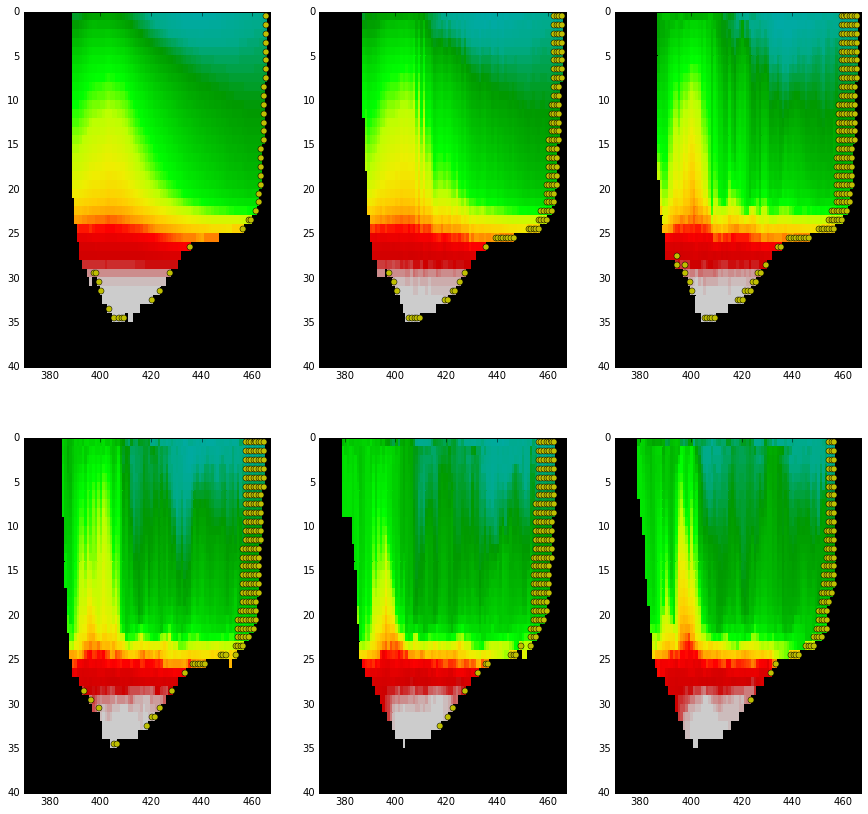

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(15, 14))
i=-1
for ax in [axs[0,0], axs[0,1], axs[0,2], axs[1,0], axs[1,1], axs[1,2]]:
    i = i + 2
    ax.pcolormesh(new_salinity[:, :, i], cmap='spectral', vmin=29)
    ax.plot(allYs[allXs==i]+0.5, allZs[allXs==i]+0.5, 'yo')
    ax.invert_yaxis()
    ax.set_xlim((370, 467));

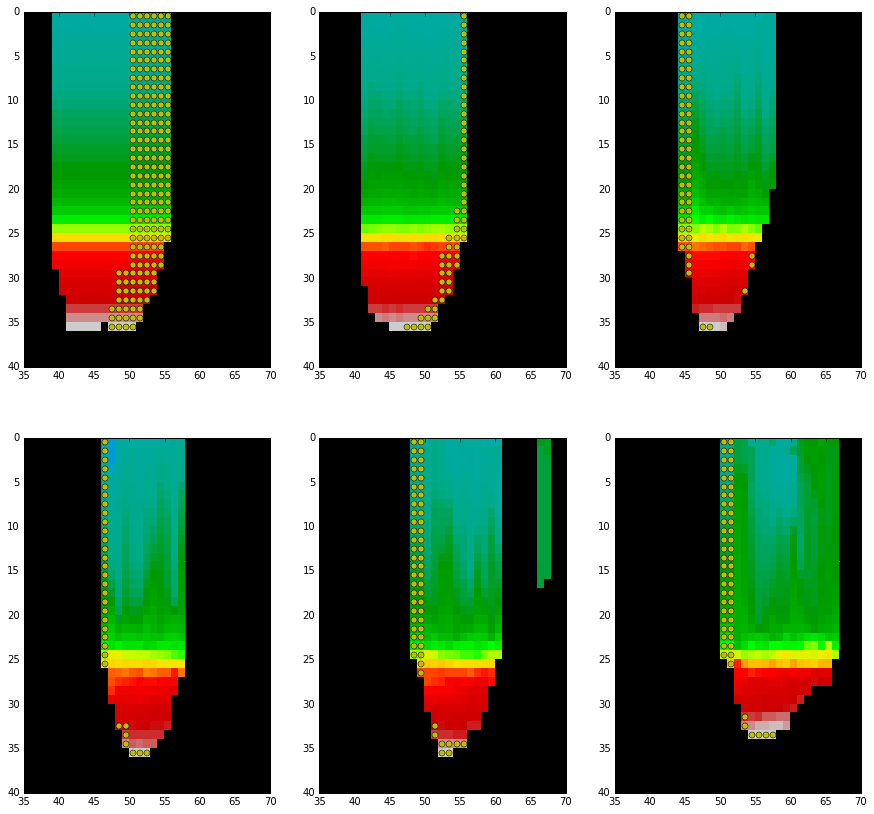

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 14))
j = 898
for ax in [axs[0,0], axs[0,1], axs[0,2], axs[1,0], axs[1,1], axs[1,2]]:
    j = j - 2
    ax.pcolormesh(new_salinity[:, j, :], cmap='spectral', vmin=29)
    ax.plot(allXs[allYs==j]+0.5, allZs[allYs==j]+0.5, 'yo')

    ax.invert_yaxis()
    ax.set_xlim((35, 70));

In [14]:
for z in range(0, 40):
    for y in range(0, 898):
        for x in range (0, 398):
            if new_tmask[0, z, y, x] == 1:
                if new_salinity[z, y, x] == 0:
                    if np.max(new_salinity[:, y, x] > 0):
                        print (x, y, z)


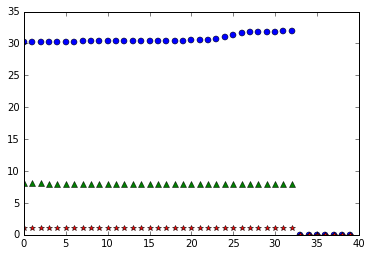

In [15]:
plt.plot(new_salinity[:, 885, 54],'o')
plt.plot(new_temperature[:, 885, 54], '^')
plt.plot(new_tmask[0, :, 885, 54], '*')

In [16]:
print (TS.variables.keys())
depths = TS.variables['deptht'][:]
lat = TS.variables['nav_lat'][:]
lon = TS.variables['nav_lon'][:]

odict_keys(['buoy_n2', 'deptht', 'deptht_bounds', 'mixed_depth', 'nav_lat', 'nav_lon', 'sossheig', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vosaline', 'votemper'])


In [19]:
# build nc file
new_TS = nc.Dataset('TS01jul2016DeepSmooth.nc', 'w')
nc_tools.init_dataset_attrs(
    new_TS, 
    title='Salinity Temperature Initial Conditions based on Jul 01, 2016 23:00 nowcast-green', 
    notebook_name='FindTSforSmoothedMouths', 
    nc_filepath='../../../nemo-forcing/initial_strat/TS01jul2016DeepSmooth.nc',
    comment='Salinity and Temperature conditions from  Jul 1, 2016 23:00 for Deep Grid, Mouth Smoothed')
new_TS.createDimension('y', 898)
new_TS.createDimension('x', 398)
new_TS.createDimension('deptht',size = len(depths))
new_TS.createDimension('time_counter', None)
nc_tools.show_dimensions(new_TS)
# variables
nav_lat = new_TS.createVariable('nav_lat', 'float32', ('y','x'))
nav_lat.long_name = 'Latitude'
nav_lat.units = 'degrees_north'
nav_lat[:] = lat
nav_lon = new_TS.createVariable('nav_lon', 'float32', ('y','x'))
nav_lon.long_name = 'Longitude'
nav_lon.units = 'degrees_east'
nav_lon[:] = lon
deptht = new_TS.createVariable('deptht', 'float32', ('deptht'))
deptht.long_name = 'Depth'
deptht.units = 'm'
deptht.positive = 'down'
deptht[:] = depths
time_counter = new_TS.createVariable('time_counter', 'float32', ('time_counter'))
time_counter.units = 'irrelevant'
time_counter.long_name = 'Time axis'
vosaline = new_TS.createVariable('vosaline', 'float32', 
                               ('time_counter','deptht','y','x'))
vosaline.units = 'g/kg'
vosaline.long_name = 'Reference Salinity'  
vosaline.coordinates = 'nav_lon nav_lat deptht time_counter'
vosaline.grid = 'Deepen by Grid Thickness'
vosaline[0] = new_salinity
votemper = new_TS.createVariable('votemper', 'float32', 
                               ('time_counter','deptht','y','x'))
votemper.units = 'degC'
votemper.long_name = 'Temperature' 
votemper.coordinates = 'nav_lon nav_lat deptht time_counter'
votemper[0] = new_temperature
new_TS.history = """[2016-07-02 Created]"""

file format: NETCDF4
Conventions: CF-1.6
title: Salinity Temperature Initial Conditions based on Jul 01, 2016 23:00 nowcast-green
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/FindTSforSmoothedMouths.ipynb
references: REQUIRED
history: [2016-07-02 09:15:31] Created netCDF4 zlib=True dataset.
comment: Salinity and Temperature conditions from  Jul 1, 2016 23:00 for Deep Grid, Mouth Smoothed
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398

<class 'netCDF4._netCDF4.Dimension'>: name = 'deptht', size = 40

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 0



In [20]:
new_TS.close()